## TF Syntax

In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#tensor - fancy word for n-dimensional array

In [4]:
print(tf.__version__)

1.13.1


In [6]:
hello = tf.constant("hello")

In [8]:
world = tf.constant("world")

In [10]:
with tf.Session() as sess: #everything inside will be run
    #we use with to make sure we don't have to close to the session
    result =  sess.run(hello + world)

In [11]:
print(result) #b is bytes literal

b'helloworld'


In [12]:
a = tf.constant(10)
b = tf.constant(20)

In [13]:
type(a)

tensorflow.python.framework.ops.Tensor

In [15]:
with tf.Session() as sess:
    result = sess.run(a + b)

In [16]:
result

30

In [17]:
const = tf.constant(10)

fill_mat = tf.fill((4,4), 10) #4 x 4 matrix filled with 10s 

In [18]:
myzeros = tf.zeros((4,4))

In [19]:
myones = tf.ones((4,4))

In [20]:
myrandn = tf.random_normal((4,4), mean=0, stddev=1)

In [21]:
myrandu = tf.random_uniform((4,4), minval=0, maxval=1)

In [22]:
my_operations = [const, fill_mat, myzeros, myones, myrandn, myrandu]

In [ ]:
#interactive session - not much use outside of notebook setting 
#allows you to constantly call it throughout multiple cells 

In [26]:
sess = tf.InteractiveSession()

C:\Users\602770\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [28]:
for op in my_operations:
    print(sess.run(op))
    print("\n")
    
    #able to show results outside of session
    #but most always using 

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-0.88492405 -0.2022739  -1.1212686  -0.47924262]
 [-0.01665164  1.3892367  -1.1295344  -0.04086769]
 [ 1.605678    0.0386879  -0.9396182  -1.0551779 ]
 [ 1.4167354   0.13292417  0.6708064   1.0185384 ]]


[[0.4856646  0.792508   0.62617886 0.5903393 ]
 [0.46118295 0.6460023  0.8616663  0.4797238 ]
 [0.5249847  0.35144126 0.13195252 0.9869405 ]
 [0.47151136 0.50512886 0.9309504  0.739316  ]]




In [29]:
for op in my_operations:
    print(op.eval())
    print("\n")
    
    #same thing, but using eval method

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-0.9440452   2.1566348   0.44765005  0.8280047 ]
 [ 0.84559435  0.9443933   0.11358335 -0.93413484]
 [-0.07819847 -1.2257872   0.9909556  -0.46398804]
 [-0.394884   -0.90898603  2.5567088  -1.2172998 ]]


[[0.10047281 0.4889922  0.18284976 0.9319601 ]
 [0.73325205 0.36353326 0.5088296  0.41029978]
 [0.223948   0.7659472  0.26883304 0.5853534 ]
 [0.2568071  0.07403374 0.3262496  0.10991645]]




## Example Neural Network 

In [30]:
n_features = 10 
n_dense_neurons = 3 

In [31]:
x = tf.placeholder(tf.float32, (None, n_features))

In [41]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons])) #weights

b = tf.Variable(tf.ones([n_dense_neurons])) #bias 

In [42]:
#Activation Function

In [43]:
xW = tf.matmul(x,W)

In [44]:
z = tf.add(xW,b)

In [45]:
# a = tf.tanh
# a = tf.nn.relu
a = tf.sigmoid(z)

In [46]:
init = tf.global_variables_initializer()

In [47]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [48]:
print(layer_out)

[[0.6555593  0.46489984 0.8824023 ]]


In [ ]:
#We need a costfunction to tweak W and b 

## Simple Regression Example - For Real 

In [50]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [51]:
x_data

array([-0.97020569,  0.74701517,  0.75389282,  3.3103488 ,  4.02643795,
        5.15577407,  5.27840068,  6.7686797 ,  9.39946479, 10.32059055])

In [52]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

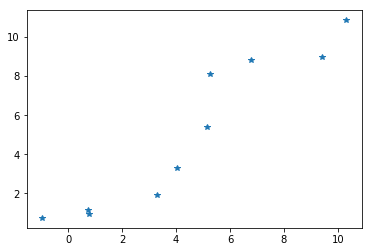

In [60]:
plt.plot(x_data, y_label, "*"); #obvious linear trend

In [61]:
#y = mx + b
np.random.rand(2)

array([0.38809071, 0.24037923])

In [62]:
m = tf.Variable(0.39)
b = tf.Variable(.24)

#These are random values - it will be up to cost function and neural network to fix that 

In [63]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b # we need the cost function to fix this 
    
    error += (y - y_hat)**2 #we want to minimize, so use optimizer
    
  

In [66]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001) #using gradient descent 
train = optimizer.minimize(error)
#learning rate defines how quickly we will desecend on this 
#too small it will take us forever - 

In [67]:
init = tf.global_variables_initializer() #global variable initializer

In [68]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 1 
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

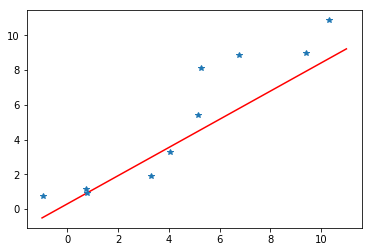

In [70]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot,'r')
plt.plot(x_data, y_label, "*")

In [78]:
new_data = np.linspace(0,20,10)

In [83]:
y_new_data = np.linspace(0,20,10)

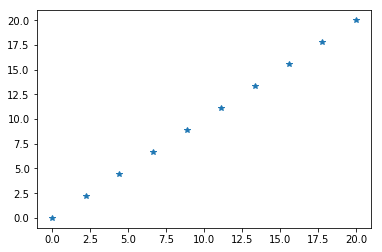

In [84]:
plt.plot(new_data, y_new_data, "*")

## Outline

### 1. Placeholders

### 2. Variables

### 3. Create Graph Operations

### 4. Loss Function 

### 5 . Optimizer 

### 6. Create Session (Run Everything)
   #### Need to Initialize Variables 

### 7. Evaluate Model 
   #### Convert responses into booleans and then determine average (probability of successful identification)